Optimal k is: 4


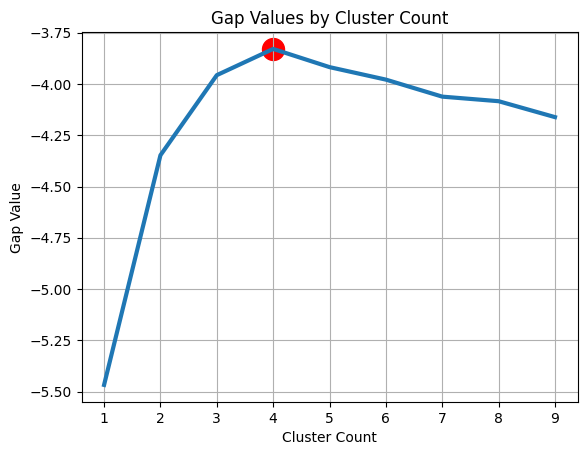

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt

def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculate the optimal number of clusters using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
    data: ndarray (n_samples, n_features)
    nrefs: number of sample reference datasets to create
    maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """

    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

data = make_blobs(n_samples=500, n_features=2, centers=4)[0]  # replace this with your actual data

k, gapdf = optimalK(data, nrefs=5, maxClusters=10)
print(f'Optimal k is: {k}')

plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()


In [ ]:
print("hello world")

Optimal k is: 4


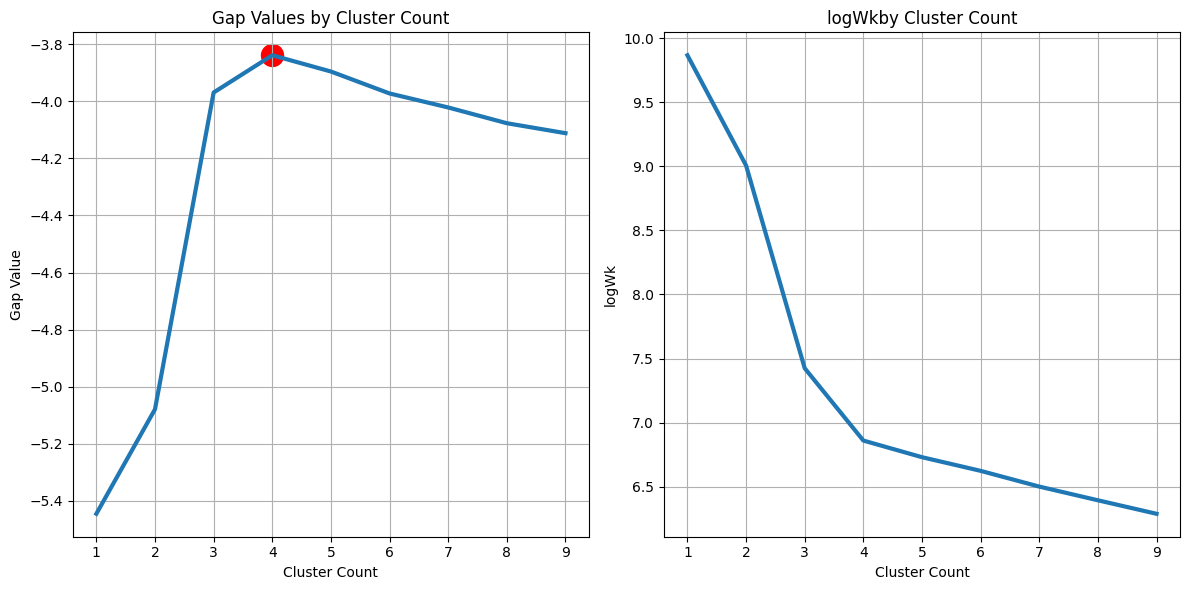

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt

def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculate the optimal number of clusters using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
    data: ndarray (n_samples, n_features)
    nrefs: number of sample reference datasets to create
    maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK, logWks)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    logWks = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[], 'logWk':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Calculate logWk
        logWk = np.log(origDisp)
        
        # Assign this loop's gap statistic and logWk to gaps and logWks
        gaps[gap_index] = gap
        logWks[gap_index] = logWk
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap, 'logWk':logWk}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

data = make_blobs(n_samples=500, n_features=2, centers=4)[0]  # replace this with your actual data

k, resultsdf = optimalK(data, nrefs=1000, maxClusters=10)
print(f'Optimal k is: {k}')

# Plotting gap values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(resultsdf.clusterCount, resultsdf.gap, linewidth=3)
plt.scatter(resultsdf[resultsdf.clusterCount == k].clusterCount, resultsdf[resultsdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')

# Plotting logWk values
plt.subplot(1, 2, 2)
plt.plot(resultsdf.clusterCount, resultsdf.logWk, linewidth=3)
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('logWk')
plt.title('logWkby Cluster Count')

plt.tight_layout()
plt.show()

